## Mutual Information score

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the train dataset

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Check missing values in dataframe

In [4]:
s = df.isna().sum()
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Seperate X and Y

In [5]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
Y = df[['Survived']]

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Sep cat, con for X

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Sex', 'Cabin', 'Embarked']

In [10]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Create a feature selection pipeline
Cat - OrdinalEncoding

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ordinal', OrdinalEncoder())])

pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)])

In [13]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 8.27377244e-01, -5.65736461e-01,  4.32793366e-01, ...,
         1.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00,  6.63861032e-01,  4.32793366e-01, ...,
         0.00000000e+00,  8.10000000e+01,  0.00000000e+00],
       [ 8.27377244e-01, -2.58337088e-01, -4.74545196e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       ...,
       [ 8.27377244e-01, -1.04637401e-01,  4.32793366e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00, -2.58337088e-01, -4.74545196e-01, ...,
         1.00000000e+00,  6.00000000e+01,  0.00000000e+00],
       [ 8.27377244e-01,  2.02761972e-01, -4.74545196e-01, ...,
         1.00000000e+00,  1.47000000e+02,  1.00000000e+00]])

In [14]:
cols = pre1.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex', 'cat__Cabin', 'cat__Embarked'], dtype=object)

In [15]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex,cat__Cabin,cat__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,147.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,81.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,147.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,55.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,147.0,2.0


### Feature selection with Mutual Information scores

In [16]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([3.58540348e-02, 2.02139151e-02, 1.41313439e-02, 1.90740603e-03,
       1.24761939e-01, 1.57232550e-01, 6.62975909e-02, 4.53468378e-05])

In [17]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

cat__Sex         0.157233
num__Fare        0.124762
cat__Cabin       0.066298
num__Pclass      0.035854
num__Age         0.020214
num__SibSp       0.014131
num__Parch       0.001907
cat__Embarked    0.000045
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

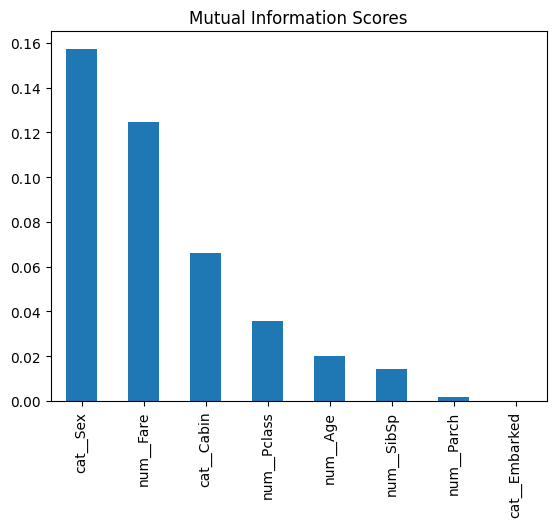

In [18]:
mi.plot(kind='bar', title='Mutual Information Scores')

In [19]:
sel_cols = list(mi.index[0:4])
sel_cols

['cat__Sex', 'num__Fare', 'cat__Cabin', 'num__Pclass']

In [20]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=4)
sel_features = sel.fit_transform(X_pre, Y)
sel_cols = sel.get_feature_names_out()

In [21]:
sel_cols

array(['num__Pclass', 'num__Fare', 'cat__Sex', 'cat__Cabin'], dtype=object)

### Extract important column names

In [22]:
sel_cols[0].split('__')[1]

'Pclass'

In [23]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [24]:
imp_cols

['Pclass', 'Fare', 'Sex', 'Cabin']

In [25]:
X_sel = X[imp_cols]
X_sel

,Pclass,Fare,Sex,Cabin
0,3,7.2500,male,NaN
1,1,71.2833,female,C85
2,3,7.9250,female,NaN
3,1,53.1000,female,C123
4,3,8.0500,male,NaN
...,...,...,...,...
886,2,13.0000,male,NaN
887,1,30.0000,female,B42
888,3,23.4500,female,NaN
889,1,30.0000,male,C148


### Create a final pipeline 
Cat - OneHotEncoder

In [26]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [27]:
cat_sel

['Sex', 'Cabin']

In [28]:
con_sel

['Pclass', 'Fare']

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)])

In [31]:
X_sel_pre = pre2.fit_transform(X_sel).toarray()
X_sel_pre

array([[ 0.82737724, -0.50244517,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.78684529,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.48885426,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.17626324,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.04438104,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.49237783,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [32]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Pclass', 'num__Fare', 'cat__Sex_female', 'cat__Sex_male',
       'cat__Cabin_A10', 'cat__Cabin_A14', 'cat__Cabin_A16',
       'cat__Cabin_A19', 'cat__Cabin_A20', 'cat__Cabin_A23',
       'cat__Cabin_A24', 'cat__Cabin_A26', 'cat__Cabin_A31',
       'cat__Cabin_A32', 'cat__Cabin_A34', 'cat__Cabin_A36',
       'cat__Cabin_A5', 'cat__Cabin_A6', 'cat__Cabin_A7',
       'cat__Cabin_B101', 'cat__Cabin_B102', 'cat__Cabin_B18',
       'cat__Cabin_B19', 'cat__Cabin_B20', 'cat__Cabin_B22',
       'cat__Cabin_B28', 'cat__Cabin_B3', 'cat__Cabin_B30',
       'cat__Cabin_B35', 'cat__Cabin_B37', 'cat__Cabin_B38',
       'cat__Cabin_B39', 'cat__Cabin_B4', 'cat__Cabin_B41',
       'cat__Cabin_B42', 'cat__Cabin_B49', 'cat__Cabin_B5',
       'cat__Cabin_B50', 'cat__Cabin_B51 B53 B55',
       'cat__Cabin_B57 B59 B63 B66', 'cat__Cabin_B58 B60',
       'cat__Cabin_B69', 'cat__Cabin_B71', 'cat__Cabin_B73',
       'cat__Cabin_B77', 'cat__Cabin_B78', 'cat__Cabin_B79',
       'cat__Cabin_B80', 'cat_

In [33]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre.head()

,num__Pclass,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,cat__Cabin_A23,...,cat__Cabin_F E69,cat__Cabin_F G63,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown
0,0.827377,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.786845,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.827377,-0.488854,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.420730,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.827377,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Train Test Split
80% train 

20% test (unseen to model)

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=10)

In [35]:
xtrain.shape

(712, 152)

In [36]:
xtest.shape

(179, 152)

### Create Logistic Regression model

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

### Check accuracy score in train and test

In [38]:
model.score(xtrain, ytrain)

0.8202247191011236

In [39]:
model.score(xtest, ytest)

0.8268156424581006

In [59]:
params = {'C':[0.01, 0.1, 10, 50, 100, 1000]}

In [60]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
gscv = GridSearchCV(lr, param_grid=params, cv=5, scoring='f1')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 10, 50, 100, 1000]}, scoring='f1')

In [61]:
gscv.best_params_

{'C': 1000}

In [62]:
gscv.best_score_

0.7160850174216028

In [63]:
best_lr = gscv.best_estimator_
best_lr

LogisticRegression(C=1000)

In [64]:
best_lr.score(xtrain, ytrain)

0.8286516853932584

In [65]:
best_lr.score(xtest, ytest)

0.776536312849162

### Predict the results

In [40]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [41]:
ypred_tr[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [42]:
ytrain.head()

,Survived
57,0
717,1
431,1
633,0
163,0


In [43]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [44]:
ytest.head()

,Survived
590,0
131,0
628,0
195,1
230,1


### Check confusion matrix

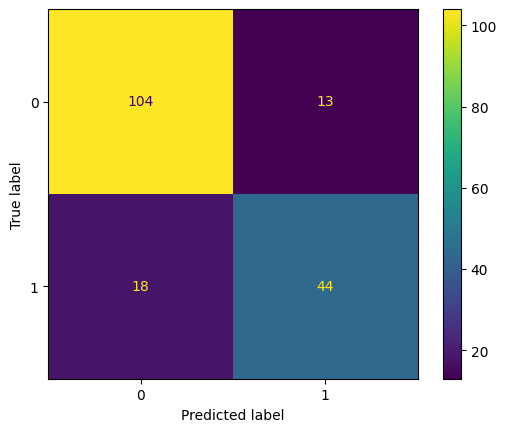

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

### Check classification report

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ypred_ts, ytest))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       122
           1       0.71      0.77      0.74        57

    accuracy                           0.83       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.83      0.83      0.83       179



### Predict the results for test_titanic.csv

In [47]:
xnew = pd.read_csv('test_titanic.csv')
xnew

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [48]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Apply preprocessing - transform

In [49]:
xnew_pre = pre2.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724, -0.49078316,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.50747884,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484, -0.45336687,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.50244517,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.48633742,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.19824428,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [50]:
xnew_pre = pd.DataFrame(xnew_pre, columns=final_cols)
xnew_pre.head()

,num__Pclass,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,cat__Cabin_A23,...,cat__Cabin_F E69,cat__Cabin_F G63,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown
0,0.827377,-0.490783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.827377,-0.507479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.369365,-0.453367,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.827377,-0.474005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,-0.401017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Predictions

In [51]:
preds = model.predict(xnew_pre)
preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
prob = model.predict_proba(xnew_pre)[:, 1]
prob 

array([0.11066751, 0.6003036 , 0.20310921, 0.11071172, 0.60098712,
       0.11074156, 0.60038495, 0.20479899, 0.60033323, 0.11153614,
       0.11067104, 0.34474552, 0.91537103, 0.20453582, 0.91448632,
       0.75655103, 0.20334155, 0.11063547, 0.6004232 , 0.60033269,
       0.34882291, 0.11042067, 0.8643575 , 0.34906523, 0.92760919,
       0.11102183, 0.91452021, 0.11063547, 0.4655638 , 0.11140426,
       0.20453582, 0.20501849, 0.60205766, 0.60242881, 0.3976254 ,
       0.11063569, 0.60043936, 0.60051855, 0.11075616, 0.11327529,
       0.11096422, 0.46503418, 0.11066861, 0.75508689, 0.94216921,
       0.11067259, 0.46545653, 0.11066331, 0.91512125, 0.60145388,
       0.46952156, 0.20357591, 0.75608215, 0.903374  , 0.20362361,
       0.11180211, 0.11067104, 0.15026882, 0.11110696, 0.92259341,
       0.11067104, 0.20344196, 0.11066331, 0.60039734, 0.51484891,
       0.75588331, 0.60041728, 0.34674478, 0.46530066, 0.903374  ,
       0.60040057, 0.11067104, 0.6004232 , 0.46519116, 0.92061

### Save the values to dataframe

In [53]:
df_final = xnew[['PassengerId']]
df_final.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [54]:
df_final['Survived_pred']=preds
df_final['Survived_prob']=prob

In [55]:
df_final

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.110668
1,893,1,0.600304
2,894,0,0.203109
3,895,0,0.110712
4,896,1,0.600987
...,...,...,...
413,1305,0,0.110679
414,1306,1,0.916476
415,1307,0,0.110637
416,1308,0,0.110679


In [56]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    263
1    155
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

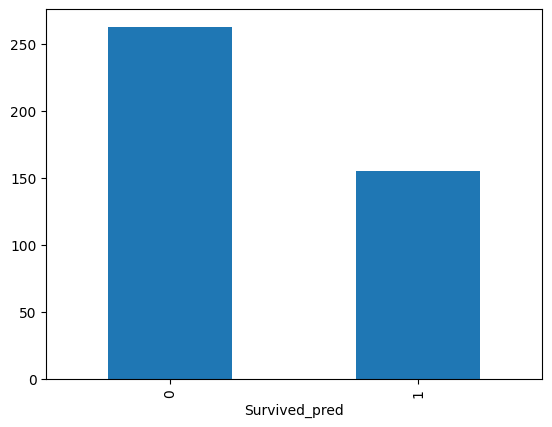

In [57]:
df_final['Survived_pred'].value_counts().plot(kind='bar')

### Save the file to results.csv

In [58]:
df_final.to_csv('results.csv', index=False)